In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

In [3]:
df=pd.read_csv("epi_r.csv")
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.tail()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,Baked Ham with Marmalade-Horseradish Glaze,4.375,560.0,73.0,10.0,3698.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [6]:
# describing the rating feature 

df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [7]:
df.calories.describe()

count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64

In [8]:
#df= df[(df["protein"]!=0.0) & (df["fat"]!=0.0) & (df["sodium"]!=0.0)]

In [9]:
df.calories.isnull().sum()

4117

In [10]:
#df.reset_index(drop=True)

In [11]:
#df[df['calories'].isnull()==1]

In [12]:
df=df[(df['calories']<10000) | (df['calories'].isnull()==1)]

In [13]:
#print(df.calories.values)

In [14]:
#cals=[]
#for row in df.calories.values:
    #if(math.isnan(row)):
       # cals.append(row)
    #else:
        #if(row<=10000):
            #cals.append(row)

In [15]:
#df2=pd.DataFrame(cals)

In [16]:
#df2.columns=["calories2"]

In [17]:
#df2.head()

In [18]:
#df2.calories2.describe()

In [19]:
#df_zero=df[df["calories"]==0]
#df_zero.calories.describe()

In [20]:
cal_mean=df.calories.mean()
print(cal_mean)

487.9006535126304


In [21]:
df.calories.isnull().sum()

4117

In [22]:
df.calories.fillna(cal_mean,inplace = True)

In [23]:
df= df[(df["protein"]!=0.0) & (df["fat"]!=0.0) & (df["sodium"]!=0.0)]

In [24]:
df.calories.describe()

count    18498.000000
mean       514.879824
std        548.773391
min         12.000000
25%        257.000000
50%        487.900654
75%        527.000000
max       9831.000000
Name: calories, dtype: float64

In [25]:
#from impyute.imputation.cs import mice

In [26]:
#X = df.drop('title', axis=1)

#imputed = mice(X.values)
#mice_calories = imputed[:, 1]
#mice_calories = [0 if cal < 0 else cal for cal in mice_calories]

In [27]:
# describing the calories feature

#df=df[df["calories"]<=1000]
#df=df[df["calories"]!=0]
#df.dropna(axis=0, subset=['calories'], inplace = True)
#df.calories.describe()


In [28]:
#no values are 0 in calories column

In [29]:
df.calories.max()

9831.0

In [30]:
#X = df.iloc[:,1:]

#imputer = IterativeImputer(BayesianRidge())
#impute_data = pd.DataFrame(imputer.fit_transform(X))

In [31]:
#cal_mean=df.calories.mean()

In [32]:
#df.calories.fillna(cal_mean)

In [33]:
import seaborn as sns

In [34]:
#sns.scatterplot(data=df['rating'])

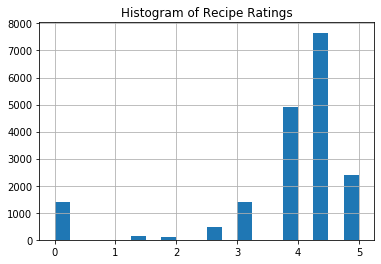

In [35]:
df.rating.hist(bins = 20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [36]:
sns.set_style("whitegrid")

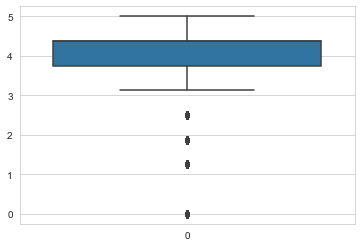

In [37]:
sns.boxplot(data = df["rating"])

In [38]:
df.rating.isnull().sum()

0

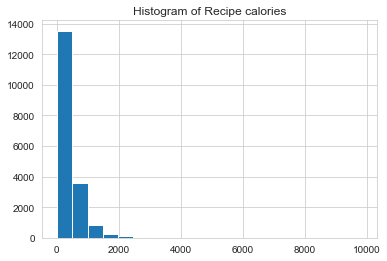

In [39]:

df.calories.hist(bins = 20 )
plt.title('Histogram of Recipe calories')
plt.show()

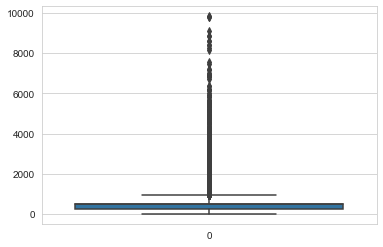

In [40]:
sns.set_style("whitegrid")
sns.boxplot(data = df["calories"])

In [41]:
#df=df[df["rating"]>=3]

In [42]:
#print(df)

In [43]:
df.sample()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
83,Jeweled Rice,5.0,517.0,7.0,18.0,20.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


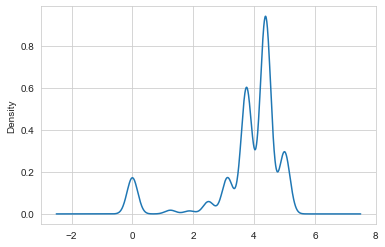

In [44]:
df['rating'].plot.kde()

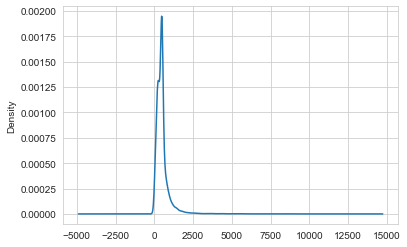

In [45]:

df['calories'].plot.kde()

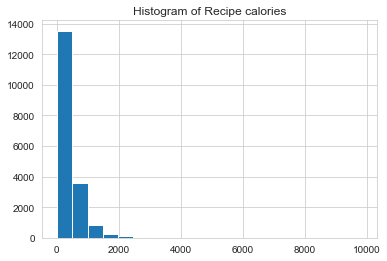

In [46]:
df.calories.hist(bins = 20)
plt.title('Histogram of Recipe calories')
plt.show()

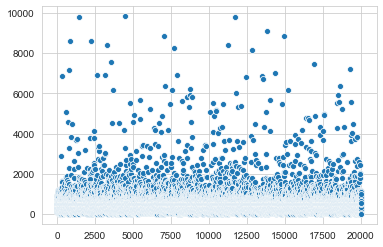

In [47]:
sns.scatterplot(data=df['calories'])

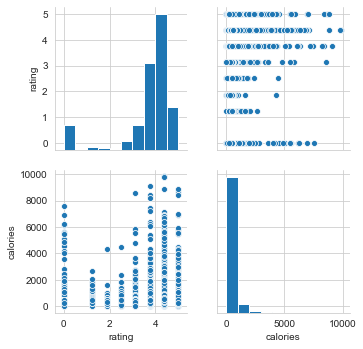

In [48]:
sns.pairplot(data=df.iloc[:,1:3])

In [49]:
#sns.heatmap(data=df.iloc[:,1:3])

In [50]:
#df= df[(df["protein"]!=0.0) & (df["fat"]!=0.0) & (df["sodium"]!=0.0)]

In [51]:
print(df)

                                             title  rating    calories  \
0                  Lentil, Apple, and Turkey Wrap    2.500  426.000000   
1      Boudin Blanc Terrine with Red Onion Confit    4.375  403.000000   
2                    Potato and Fennel Soup Hodge    3.750  165.000000   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000  487.900654   
4                        Spinach Noodle Casserole    3.125  547.000000   
...                                            ...     ...         ...   
20047                              Parmesan Puffs    3.125   28.000000   
20048              Artichoke and Parmesan Risotto    4.375  671.000000   
20049                       Turkey Cream Puff Pie    4.375  563.000000   
20050     Snapper on Angel Hair with Citrus Cream    4.375  631.000000   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375  560.000000   

       protein   fat  sodium  #cakeweek  #wasteless  22-minute meals  \
0         30.0   7.0   559.0        0.0

In [52]:
c=0;
for col in df.iloc[:,6:].columns:
    
    if len(df[df[col]==1])==0:
        df = df.drop(columns=col)
        print(col)
        c=c+1
    
print(" No of columns to drop : ",c)
    
    
    

mezcal
sorbet
 No of columns to drop :  2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18498 entries, 0 to 20051
Columns: 678 entries, title to turkey
dtypes: float64(677), object(1)
memory usage: 96.5+ MB


In [54]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,487.900654,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#X=df['rating']

In [56]:
corr_matrix = df.iloc[:,1:6].corr().abs()

In [57]:
print(corr_matrix)

            rating  calories   protein       fat    sodium
rating    1.000000  0.050361  0.063540  0.061199  0.015878
calories  0.050361  1.000000  0.683439  0.906235  0.225605
protein   0.063540  0.683439  1.000000  0.528804  0.350408
fat       0.061199  0.906235  0.528804  1.000000  0.140986
sodium    0.015878  0.225605  0.350408  0.140986  1.000000


In [58]:
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [59]:
#to_drop = [column for column in df.iloc[:,1:6].columns if any(df[column] > 0.70)]
#print('Columns to drop: ' , (len(to_drop)))

In [60]:
R=df['rating'].values

In [61]:
print(R)

[2.5   4.375 3.75  ... 4.375 4.375 4.375]


In [62]:
#Shapiro-Wilk Test

In [63]:
from scipy.stats import shapiro

In [64]:
stat, p = shapiro(R)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.699, p=0.000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian ')
else:
    print('Sample does not look Gaussian ')

Sample does not look Gaussian 


In [66]:
#D’Agostino’s K^2 test

In [67]:
from scipy.stats import normaltest

In [68]:
stat, p = normaltest(R)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=7088.351, p=0.000


In [69]:
#Anderson-Darling Test

In [70]:
from scipy.stats import anderson

In [71]:
result = anderson(R)
print('Statistic: %.3f' % result.statistic)

Statistic: 1972.684


In [72]:
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal ' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal ' % (sl, cv))

15.000: 0.576, data does not look normal 
10.000: 0.656, data does not look normal 
5.000: 0.787, data does not look normal 
2.500: 0.918, data does not look normal 
1.000: 1.092, data does not look normal 


In [73]:
#Testing if calories is normally distributed 

In [74]:
C=df['calories'].values

In [75]:
#D’Agostino’s K^2 test

In [76]:
stat, p = normaltest(C)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=22808.221, p=0.000


In [77]:
#Shapiro-Wilk Test

In [78]:
stat, p = shapiro(C)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.520, p=0.000


In [79]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian ')

Sample does not look Gaussian 


In [80]:
#Testing if protein is normally distributed 

In [81]:
df.protein.describe()

count    14346.000000
mean        23.446396
std         44.204352
min          1.000000
25%          4.000000
50%         10.000000
75%         30.000000
max       1625.000000
Name: protein, dtype: float64

In [82]:
df.protein.isnull().sum()

4152

In [83]:
protein_mean=df.protein.mean()
print(protein_mean)

23.44639620800223


In [84]:
df.protein.fillna(protein_mean,inplace = True)

In [85]:
P=df['protein'].values

In [86]:
#Shapiro-Wilk Test

In [87]:
stat, p = shapiro(P)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.414, p=0.000


In [88]:
#D’Agostino’s K^2 test

In [89]:
stat, p = normaltest(P)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=33550.578, p=0.000


In [90]:

#  Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df.calories.values
data2 = df.protein.values
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.752, p=0.000
Probably dependent


In [91]:

#  Mann-Whitney U Test
#from scipy.stats import mannwhitneyu
#data1 = df.calories.values
#data2 = df.protein.values
#stat, p = mannwhitneyu(data1, data2)
#print('stat=%.3f, p=%.3f' % (stat, p))
#if p > 0.05:
#	print('Probably the same distribution')
#else:
#	print('Probably different distributions')


stat=2588216.500, p=0.000
Probably different distributions


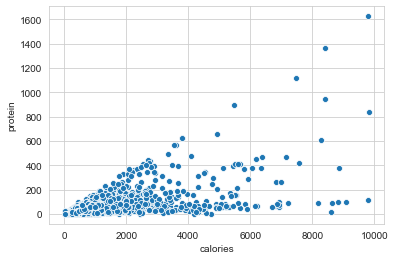

In [100]:
sns.scatterplot(data=df, x="calories", y="protein")

In [101]:
from scipy.stats import pearsonr

In [102]:
X=df['calories'].values
Y=df['protein'].values
pearsonr(X,Y)
    

(0.6828918924101348, 0.0)